<a href="https://colab.research.google.com/github/Juribe7980/project-2/blob/main/Project_2_part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wines of Spain

by Jessica Uribe

Context
This dataset is related to red variants of spanish wines. The dataset describes several popularity and description metrics their effect on it's quality. The datasets can be used for classification or regression tasks. The classes are ordered and not balanced (i.e. the quality goes from almost 5 to 4 points). The task is to predict either the quality of wine or the prices using the given data.

Content
The dataset contains 7500 different types of red wines from Spain with 11 features that describe their price, rating, and even some flavor description. The was collected by me using web scraping from different sources (from wine specialized pages to supermarkets). Please acknowledge the hard work to obtain and create this dataset, you can upvote it if you find it useful to use on your projects :)

If the dataset becomes popular I will probably try to create a bigger version with wines from other countries and a wider spectrum of ratings.



Attribute Information




winery: Winery name

wine: Name of the wine

year: Year in which the grapes were harvested

rating: Average rating given to the wine by the users [from 1-5]

num_reviews: Number of users that reviewed the wine

country: Country of origin [Spain]

region: Region of the wine

price: Price in euros [€]

type: Wine variety

body: Body score, defined as the richness and weight of the wine in your mouth [from 1-5]

acidity: Acidity score, defined as wine's “pucker” or tartness; it's what makes a wine refreshing and your tongue salivate and want another sip [from 1-5]

Source

https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset


In [ ]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
# MatPlotLib
import matplotlib.pyplot as plt
## seaborn
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer


## Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA

## Regression Metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, \
precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay, \
classification_report



## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

In [ ]:
## Connect to Drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/gdrive/MyDrive/Week 5(JJ) Regression and classification/wines_SPA.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
## Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 7500 rows, and 11 columns.
The rows represent 7500 observations, and the columns represent 10 features and 1 target variable.


In [ ]:
#columns in this dataset
df.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

In [ ]:
df.drop(columns='country', inplace=True)

In [ ]:
# checking null values
df.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [ ]:
## Replace inconsistent value in year
df['year'].replace('N.V.', '2012',inplace=True)
df['year'].fillna('2012', inplace = True)
## Coverting 'object' to 'float' for year column
df['year'] = df['year'].astype(int)

# calling dtypes to confirm change
df['year'].dtypes

dtype('int64')

In [ ]:
# Rounding wine years to the nearest decade
df['year'] = df['year'].round(-1)
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2010,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2020,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2010,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,2000,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,2000,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
df['year'].value_counts()


2020    4149
2010    2670
2000     565
1990      40
1980      29
1970      17
1960      17
1950       6
1930       3
1920       2
1940       1
1910       1
Name: year, dtype: int64

In [ ]:
df.describe(include='all')

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
count,7500,7500,7500.000000,7500.000000,7500.000000,7500,7500.000000,6955,6331.000000,6331.000000
unique,480,847,NaN,NaN,NaN,76,NaN,21,NaN,NaN
top,Contino,Reserva,NaN,NaN,NaN,Rioja,NaN,Rioja Red,NaN,NaN
freq,457,467,NaN,NaN,NaN,2440,NaN,2357,NaN,NaN
mean,NaN,NaN,2014.225333,4.254933,451.109067,NaN,60.095822,NaN,4.158427,2.946612
std,NaN,NaN,8.336815,0.118029,723.001856,NaN,150.356676,NaN,0.583352,0.248202
min,NaN,NaN,1910.000000,4.200000,25.000000,NaN,4.990000,NaN,2.000000,1.000000
25%,NaN,NaN,2010.000000,4.200000,389.000000,NaN,18.900000,NaN,4.000000,3.000000
50%,NaN,NaN,2020.000000,4.200000,404.000000,NaN,28.530000,NaN,4.000000,3.000000
75%,NaN,NaN,2020.000000,4.200000,415.000000,NaN,51.350000,NaN,5.000000,3.000000


In [ ]:
# top 10 type of wines and their entries
df.type.value_counts().head(5)

Rioja Red               2357
Ribera Del Duero Red    1407
Red                      864
Priorat Red              674
Toro Red                 296
Name: type, dtype: int64

In [ ]:
# filling null values with a mean value
df['body'] = df['body'].fillna(df['body'].mean())
df['type'] = df['type'].fillna('Rioja red')
df['acidity'] = df['acidity'].fillna(df['acidity'].mean())

In [ ]:
# datatypes of variables in the dataset
df.dtypes

winery          object
wine            object
year             int64
rating         float64
num_reviews      int64
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object

In [ ]:
df.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'region', 'price',
       'type', 'body', 'acidity'],
      dtype='object')

Checking for missing values

In [ ]:
df.isna().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

In [ ]:
df[df.isna().any(axis = 1)]

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity


In [ ]:
df.value_counts()

winery                            wine                   year  rating  num_reviews  region    price  type         body      acidity 
Binigrau                          Nounat                 2020  4.2     404          Mallorca  19.90  Rioja red    4.158427  2.946612    220
Ramon do Casar                    Treixadura             2020  4.2     407          Ribeiro   11.95  Rioja red    4.158427  2.946612    220
Portal del Priorat                Clos del Portal Somni  2010  4.2     404          Priorato  77.36  Priorat Red  4.000000  3.000000    199
Contino                           Rioja Graciano         2010  4.2     395          Rioja     61.94  Rioja Red    4.000000  3.000000    199
La Rioja Alta                     Vina Alberdi Crianza   2020  4.2     410          Rioja     13.58  Rioja Red    4.000000  3.000000    199
                                                                                                                                       ... 
Contino                    

In [ ]:
df['rating'].value_counts()

4.2    5679
4.3     707
4.4     484
4.5     281
4.6     191
4.7     112
4.8      44
4.9       2
Name: rating, dtype: int64

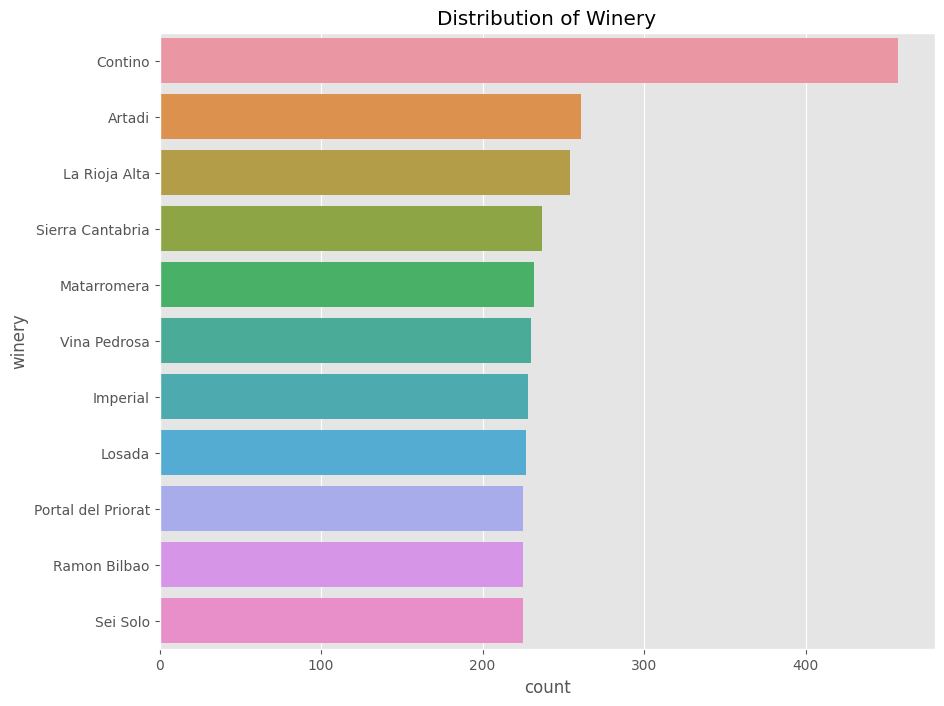

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y='winery',data=df, order=df['winery'].value_counts().index[:11])
plt.title('Distribution of Winery')
plt.show()

contina has the highest bar of more than 400 entries, Arcadi comes 2nd with approximately 300 entries.The rest have bars that are almost the same. conclusions: Contino is the most dominant winery, arcadi is the 2nd most dominant while the rest have almost the same distibution.

type
Pedro Ximenez           148.874286
Ribera Del Duero Red    109.450450
Priorat Red             104.794475
Chardonnay               78.114615
Sparkling                76.794000
Toro Red                 76.522264
Tempranillo              73.413897
Montsant Red             72.024118
Cava                     60.547576
Grenache                 57.506286
Name: price, dtype: float64


Text(0.5, 1.0, 'Distribution of type in relation to price')

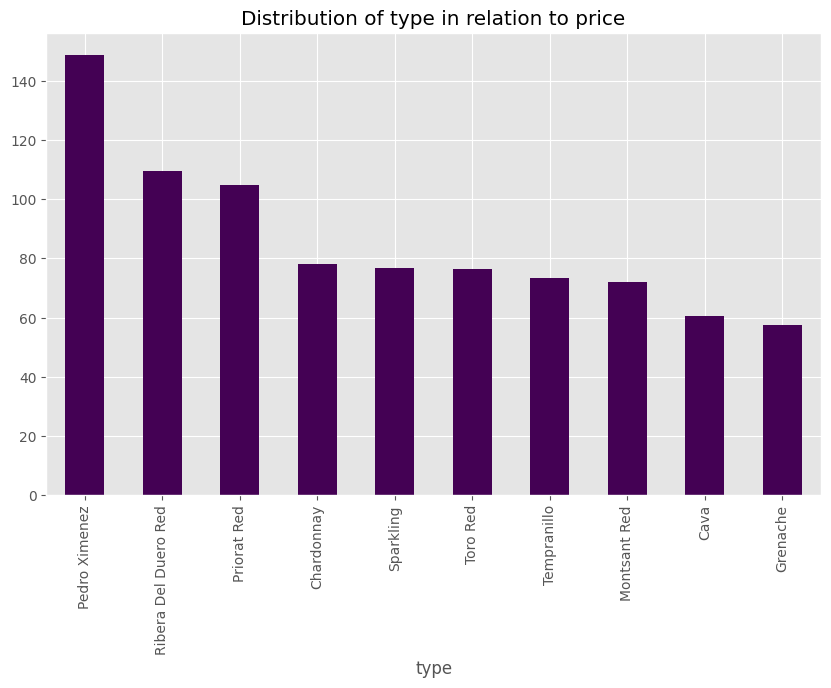

In [ ]:
dgf =df.groupby('type')['price'].mean().sort_values(ascending=False)[:10]
print(dgf)
plt.figure(figsize=(10, 6))
dgf.plot(kind='bar', cmap='viridis')
plt.title('Distribution of type in relation to price')

Pedro ximenez has the highest bar of 148.47 entries while Grenache has the lowest bar of 57.5 entries.This shows that Petro ximenez is the most expensive type while Grenache is the least expensive type in the top 10 wine types.

winery
Barbadillo                4.700000
Vega Sicilia              4.671134
Finca Moncloa             4.650000
Bodegas El Nido           4.607692
Dominio de Calogia        4.600000
Vina Real                 4.600000
Alvear                    4.600000
La Legua                  4.600000
Francisco Garcia Perez    4.600000
Bodegas Yuste             4.600000
Name: rating, dtype: float64


Text(0.5, 1.0, 'Distribution of winery in relation to ratings')

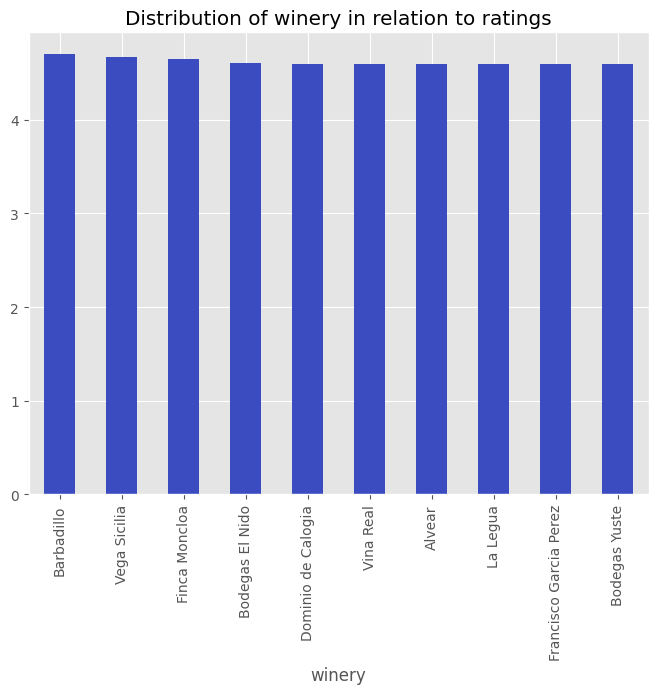

In [ ]:
dfg = df.groupby('winery')['rating'].mean().sort_values(ascending=False)[:10]
print(dfg)
plt.figure(figsize=(8, 6))
dfg.plot(kind='bar', cmap='coolwarm')
plt.title('Distribution of winery in relation to ratings')

Barbadillo has the highest bar of 4.7 entries while the rest of the ariables hae the same size of bar. Conclusion: Barbadillo winery has the ratings of 4.7 while the rest has the same ratings of 4.6 in the top 10 wineries.

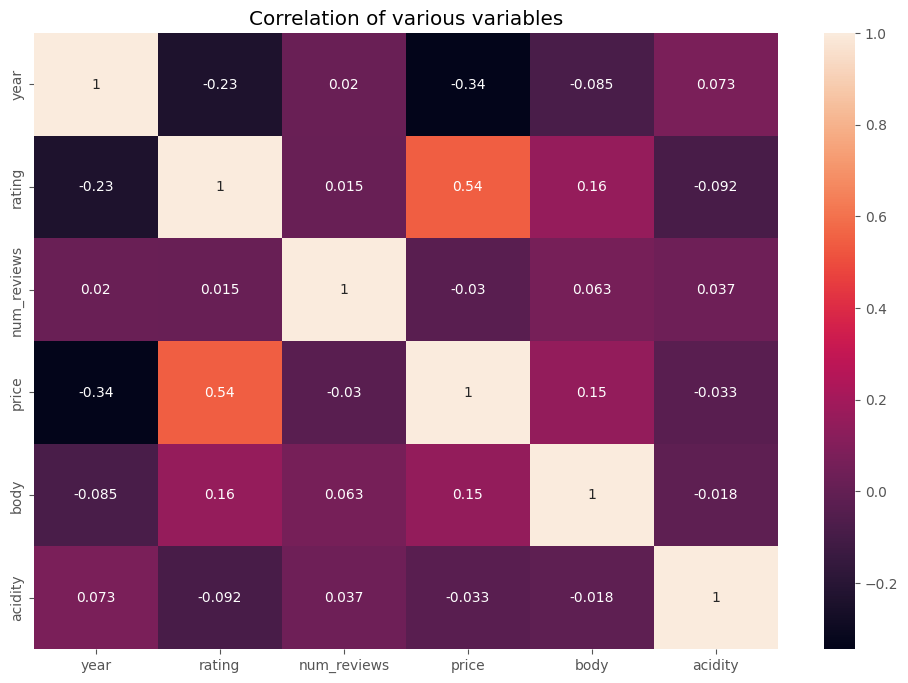

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation of various variables')
plt.show()


Correlation shows degree of linear relationship between variables.It varies from -1 to 1.price and ratings have the highest ratings of 48% mening that they are fairly positive correlated thus when ratings increase, price increase with approximately 50% of the initial increase in ratings. num-reviews and acidity have the lowest positive correlation of 5.2% meaning that number of rviews are lowly affected by the acidity of the wine thus low correlation.

In [ ]:
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2010,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2020,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2010,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,2000,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,2000,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
# statistics on rating column
df.rating.describe()

count    7500.000000
mean        4.254933
std         0.118029
min         4.200000
25%         4.200000
50%         4.200000
75%         4.200000
max         4.900000
Name: rating, dtype: float64

In [ ]:
# mean of the rating column
mean = df['rating'].mean()

In [ ]:
# a list to convert rating column into a categorical variable
ist_rate = []
ist_rate_ = [] 
for s in df.rating:
    if ( s < mean):
        ist_rate.append('Normal')
        ist_rate_.append(0)
    if (s >= mean):
        ist_rate.append('High')
        ist_rate_.append(1)
df['ratings'] = ist_rate
df.head()


,winery,wine,year,rating,num_reviews,region,price,type,body,acidity,ratings
0,Teso La Monja,Tinto,2010,4.9,58,Toro,995.00,Toro Red,5.0,3.0,High
1,Artadi,Vina El Pison,2020,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0,High
2,Vega Sicilia,Unico,2010,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0,High
3,Vega Sicilia,Unico,2000,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0,High
4,Vega Sicilia,Unico,2000,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0,High


In [ ]:
wspa = df.loc[:, ['price','body', 'acidity','ratings', 'type','wine', 'winery']]

In [ ]:
wspa.duplicated().sum()

5513

In [ ]:
wspa= wspa.drop_duplicates()

In [ ]:
wspa.describe(exclude='number')

,ratings,type,wine,winery
count,1987,1987,1987,1987
unique,2,22,847,480
top,High,Ribera Del Duero Red,Tinto,Vega Sicilia
freq,1759,519,55,90


In [ ]:
# Inspect categorical columns for errors
cat_cols = make_column_selector(dtype_include='object')(wspa)
for col in cat_cols:
  display(wspa[col].value_counts(normalize=True))

High      0.885254
Normal    0.114746
Name: ratings, dtype: float64

Ribera Del Duero Red    0.261198
Rioja Red               0.219930
Priorat Red             0.107197
Red                     0.105184
Rioja red               0.053347
Toro Red                0.038752
Tempranillo             0.036236
Sherry                  0.028183
Rioja White             0.018621
Pedro Ximenez           0.017614
Albarino                0.017111
Grenache                0.017111
Cava                    0.016105
Verdejo                 0.013588
Monastrell              0.009059
Mencia                  0.008556
Montsant Red            0.008556
Syrah                   0.007549
Chardonnay              0.006039
Cabernet Sauvignon      0.005536
Sparkling               0.002516
Sauvignon Blanc         0.002013
Name: type, dtype: float64

Tinto                                                 0.027680
Unico                                                 0.019628
Reserva                                               0.015098
Valbuena 5o                                           0.014092
Ribera del Duero                                      0.012079
                                                        ...   
San Valentin Parellada                                0.000503
Silvanus Edicion Limitada Ribera del Duero            0.000503
El Jardin de las Iguales Vinedo Historico Garnacha    0.000503
Garnacha Vinas Centenarias                            0.000503
Capricho Crianza                                      0.000503
Name: wine, Length: 847, dtype: float64

Vega Sicilia                            0.045294
Artadi                                  0.021137
Alvaro Palacios                         0.019628
La Rioja Alta                           0.016608
Martinet                                0.015098
                                          ...   
Valdelosfrailes                         0.000503
Briego                                  0.000503
Guillem Carol - Cellers Carol Valles    0.000503
Particular                              0.000503
Binigrau                                0.000503
Name: winery, Length: 480, dtype: float64

##Split Data

In [ ]:
# Define features (X) and target (y)
target = 'rating'
y = df[target].copy()
X = df.drop(columns = [target]).copy()

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
# Check how many samples of each class are present for train
y_train.value_counts(normalize=True)

4.2    0.757156
4.3    0.094222
4.4    0.064533
4.5    0.037511
4.6    0.025422
4.7    0.014933
4.8    0.005867
4.9    0.000356
Name: rating, dtype: float64

In [ ]:
## Check how many samples of each class are present for test
y_test.value_counts(normalize=True)

4.2    0.757333
4.3    0.094400
4.4    0.064533
4.5    0.037333
4.6    0.025600
4.7    0.014933
4.8    0.005867
Name: rating, dtype: float64

#Preprocessing for Machine Learing
Transformers

In [ ]:
#instatiate the transformerscaler = StandarScaler()
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
# Instantiate the transformers
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
num_cols = make_column_selector(dtype_include='number')
cat_cols = ['object']



In [ ]:
## Create the preprocessor using make_column_transformer
preprocessor = make_column_transformer(number_tuple,
                                       category_tuple,
                                       remainder='drop')

#Models

##Decision Tree Regressor

In [ ]:
# Create an instance of the model
dect= DecisionTreeRegressor()
# Create a model pipeline
dect_pipe = make_pipeline(preprocessor, dect)
# Fit the model
dect_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3231abd100>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3231abd910>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [ ]:
# Predictions for train and test
dect_pipe.predict(X_train)
dect_pipe.predict(X_test)

array([4.2, 4.2, 4.2, ..., 4.2, 4.3, 4.2])

In [ ]:
# Train and Test scores
dect_train_score = dect_pipe.score(X_train, y_train)
dect_test_score = dect_pipe.score(X_test, y_test)
print(dect_train_score)
print(dect_test_score)

1.0
0.7477316939099296


In [ ]:
# Params for tuning
dect_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f3231abd100>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f3231abd910>)])),
  ('decisiontreeregressor', DecisionTreeRegressor())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3231abd100>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                             

In [ ]:
# Tune DT with GridSearchCV
dect_param_grid = {'decisiontreeregressor__max_features': [6,8,10],
                 'decisiontreeregressor__max_depth':[20,45,75,85]}

# GridSearch using pipeline and param grid
dect_gs = GridSearchCV(dect_pipe, dect_param_grid)

# fitting GSCV
dect_gs.fit(X_train, y_train)

# print best parameters
print('Best Random Forest Parameters:')
print(dect_gs.best_params_)

# print accuracy using .best_estimator
dect_best = dect_gs.best_estimator_
print(f'Accuracy of Random Forest Model: {dect_best.score(X_test, y_test)}')

Best Random Forest Parameters:
{'decisiontreeregressor__max_depth': 75, 'decisiontreeregressor__max_features': 10}
Accuracy of Random Forest Model: 0.728088067169441


In [ ]:
dect_tuned = DecisionTreeRegressor(max_features=8, max_depth=85, random_state=42)

dect_tuned_pipe = make_pipeline(preprocessor, dect_tuned)

dect_tuned_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3231abd100>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3231abd910>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=85, max_features=8,
                                       random_state=42))])

In [ ]:
# Train and Test scores
dect_train_score = dect_tuned_pipe.score(X_train, y_train)
dect_test_score = dect_tuned_pipe.score(X_test, y_test)
print(dect_train_score)
print(dect_test_score)

0.9221784367176341
0.7280865632748726


In [ ]:
pca = PCA()

transformer = make_pipeline(preprocessor, pca)

dect1_tree = DecisionTreeRegressor(random_state = 42)

dect1_pcs = make_pipeline(transformer, dect1_tree)

In [ ]:
# train with PCA
%timeit dect1_pcs.fit(X_train, y_train)

8.07 s ± 1.72 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# Save the model's predictions for the train dataset
%timeit dect1_train_preds = dect1_pcs.predict(X_train)
# Save the model's predictions for the test dataset
%timeit dect1_test_preds = dect1_pcs.predict(X_test)

747 ms ± 18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
226 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# Checking the accurancy of our model with PCA 
print('Testing accuracy:', dect1_pcs.score(X_test, y_test))

Testing accuracy: 0.6902577220331405


##Random Forest Regressor

In [ ]:
# Create an instance of the model
rf = RandomForestRegressor()
# Create a model pipeline
rf_pipe = make_pipeline(preprocessor, rf)
# Fit the model
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3231abd100>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3231abd910>)])),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:
# Predictions for train and test
rf_pipe.predict(X_train)
rf_pipe.predict(X_test)

array([4.2  , 4.2  , 4.2  , ..., 4.2  , 4.324, 4.2  ])

In [ ]:
# Train and Test scores
rf_train_score = rf_pipe.score(X_train, y_train)
rf_test_score = rf_pipe.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9784790357908072
0.8449660823848114


In [ ]:
# Params for tuning
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f3231abd100>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f3231abd910>)])),
  ('randomforestregressor', RandomForestRegressor())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3231abd100>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                             

In [ ]:
# Tune rf with GridSearchCV
rf_param_grid = {'randomforestregressor__max_features': [6,8,10],
                 'randomforestregressor__n_estimators':[20,45,75,85],
                 'randomforestregressor__max_depth': [10,20,45,75]}

# GridSearch using pipeline and param grid
rf_gs = GridSearchCV(rf_pipe, rf_param_grid)

# fitting GSCV
rf_gs.fit(X_train, y_train)

# print best parameters
print('Best Random Forest Parameters:')
print(rf_gs.best_params_)

# print accuracy using .best_estimator
rf_best = rf_gs.best_estimator_
print(f'Accuracy of Random Forest Model: {rf_best.score(X_test, y_test)}')

Best Random Forest Parameters:
{'randomforestregressor__max_depth': 75, 'randomforestregressor__max_features': 10, 'randomforestregressor__n_estimators': 85}
Accuracy of Random Forest Model: 0.8266114630588686


In [ ]:
rf_tuned = RandomForestRegressor(max_features=10, n_estimators=85, max_depth=75, random_state=42)

rf_tuned_pipe = make_pipeline(preprocessor, rf_tuned)

In [ ]:
rf_tuned_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3231abd100>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3231abd910>)])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=75, max_features=10,
                                       n_estimators=85, random_state=42))])

In [ ]:
# Train and Test scores
rf1_train_score = rf_tuned_pipe.score(X_train, y_train)
rf1_test_score = rf_tuned_pipe.score(X_test, y_test)
print(rf1_train_score)
print(rf1_test_score)

0.9523694868855193
0.8247371751712607
